In [1]:
# Import setup and seaborn_helpers
from setup.setup import *
from seaborn_helpers import *

In [2]:
# Load cdl dataframe
cdlDF = load_and_clean_cdl_data()
cdlDF

c:\Users\David Harler Jr\OneDrive\Desktop\dataClass\06-cod-analysis\03 CDL PrizePicks Betting\cdl_prizepicks_betting\cdl-betting-app-v03\setup\setup.py:41: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cdlDF = sqlio.read_sql_query("SELECT * FROM cdl_data", conn)


,match_id,match_date,match_day,player,team,map_num,map_name,gamemode,kills,deaths,...,series_result,map_wl,team_abbr,team_icon,opp,opp_abbr,opp_score,total_score,score_diff,dummy_x
0,27193,2023-12-08,Friday,aBeZy,Atlanta FaZe,1,Karachi,Hardpoint,24,24,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
1,27193,2023-12-08,Friday,Cellium,Atlanta FaZe,1,Karachi,Hardpoint,21,19,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
2,27193,2023-12-08,Friday,Drazah,Atlanta FaZe,1,Karachi,Hardpoint,25,22,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
3,27193,2023-12-08,Friday,Simp,Atlanta FaZe,1,Karachi,Hardpoint,33,23,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
4,27193,2023-12-08,Friday,Capsidal,Boston Breach,1,Karachi,Hardpoint,24,26,...,0,L,BOS,Breach,Atlanta FaZe,ATL,250,488,-12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5683,70661,2024-05-19,Sunday,Shotzzy,OpTic Texas,4,Rio,Hardpoint,37,22,...,1,W,TX,OpTic,Toronto Ultra,TOR,118,368,132,0
5684,70661,2024-05-19,Sunday,CleanX,Toronto Ultra,4,Rio,Hardpoint,24,28,...,0,L,TOR,Ultra,OpTic Texas,TX,250,368,-132,0
5685,70661,2024-05-19,Sunday,Envoy,Toronto Ultra,4,Rio,Hardpoint,20,31,...,0,L,TOR,Ultra,OpTic Texas,TX,250,368,-132,0
5686,70661,2024-05-19,Sunday,Insight,Toronto Ultra,4,Rio,Hardpoint,12,27,...,0,L,TOR,Ultra,OpTic Texas,TX,250,368,-132,0


In [3]:
# Build series summaries
series_summaries = build_series_summaries(cdlDF)
series_summaries

,match_id,team,team_icon,map_wins,map_losses,series_score_diff,match_date,opp
0,27193,Atlanta FaZe,FaZe,3,2,1,2023-12-08,Breach
1,27193,Boston Breach,Breach,2,3,-1,2023-12-08,FaZe
2,27194,Los Angeles Thieves,Thieves,1,3,-2,2023-12-08,Surge
3,27194,Seattle Surge,Surge,3,1,2,2023-12-08,Thieves
4,27195,New York Subliners,Subliners,3,2,1,2023-12-08,OpTic
...,...,...,...,...,...,...,...,...
355,70659,Toronto Ultra,Ultra,3,2,1,2024-05-19,FaZe
356,70660,Atlanta FaZe,FaZe,2,3,-1,2024-05-19,OpTic
357,70660,OpTic Texas,OpTic,3,2,1,2024-05-19,FaZe
358,70661,OpTic Texas,OpTic,4,0,4,2024-05-19,Ultra


In [4]:
# Build maps 1 - 3 kill totals
adj_1_thru_3_totals = build_1_thru_3_totals(cdlDF).copy()
adj_1_thru_3_totals

,match_id,player,match_date,team_abbr,kills
0,27193,Cellium,2023-12-08,ATL,45
1,27193,Drazah,2023-12-08,ATL,51
2,27193,Simp,2023-12-08,ATL,72
3,27193,aBeZy,2023-12-08,ATL,54
4,27193,Capsidal,2023-12-08,BOS,58
...,...,...,...,...,...
1323,70661,Scrap,2024-05-19,TOR,54
1324,70661,Dashy,2024-05-19,TX,52
1325,70661,Kenny,2024-05-19,TX,61
1326,70661,Pred,2024-05-19,TX,54


In [5]:
# Filter maps
cdlDF = filter_maps(cdlDF)
cdlDF

,match_id,match_date,match_day,player,team,map_num,map_name,gamemode,kills,deaths,...,series_result,map_wl,team_abbr,team_icon,opp,opp_abbr,opp_score,total_score,score_diff,dummy_x
0,27193,2023-12-08,Friday,aBeZy,Atlanta FaZe,1,Karachi,Hardpoint,24,24,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
1,27193,2023-12-08,Friday,Cellium,Atlanta FaZe,1,Karachi,Hardpoint,21,19,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
2,27193,2023-12-08,Friday,Drazah,Atlanta FaZe,1,Karachi,Hardpoint,25,22,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
3,27193,2023-12-08,Friday,Simp,Atlanta FaZe,1,Karachi,Hardpoint,33,23,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
4,27193,2023-12-08,Friday,Capsidal,Boston Breach,1,Karachi,Hardpoint,24,26,...,0,L,BOS,Breach,Atlanta FaZe,ATL,250,488,-12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4579,70661,2024-05-19,Sunday,Shotzzy,OpTic Texas,4,Rio,Hardpoint,37,22,...,1,W,TX,OpTic,Toronto Ultra,TOR,118,368,132,0
4580,70661,2024-05-19,Sunday,CleanX,Toronto Ultra,4,Rio,Hardpoint,24,28,...,0,L,TOR,Ultra,OpTic Texas,TX,250,368,-132,0
4581,70661,2024-05-19,Sunday,Envoy,Toronto Ultra,4,Rio,Hardpoint,20,31,...,0,L,TOR,Ultra,OpTic Texas,TX,250,368,-132,0
4582,70661,2024-05-19,Sunday,Insight,Toronto Ultra,4,Rio,Hardpoint,12,27,...,0,L,TOR,Ultra,OpTic Texas,TX,250,368,-132,0


In [14]:
# Build team summaries
team_summaries = build_team_summaries(cdlDF)
team_summaries

,team,team_icon,gamemode,map_name,wins,losses,total,win_percentage
0,Atlanta FaZe,FaZe,Hardpoint,6 Star,2,2,4,0.50
1,Atlanta FaZe,FaZe,Hardpoint,Karachi,11,3,14,0.79
2,Atlanta FaZe,FaZe,Hardpoint,Rio,7,0,7,1.00
3,Atlanta FaZe,FaZe,Hardpoint,Sub Base,1,5,6,0.17
4,Atlanta FaZe,FaZe,Hardpoint,Vista,6,0,6,1.00
...,...,...,...,...,...,...,...,...
187,Seattle Surge,Surge,Search & Destroy,Overall,15,12,27,0.56
188,Seattle Surge,Surge,Control,Overall,8,22,30,0.27
189,Toronto Ultra,Ultra,Hardpoint,Overall,30,10,40,0.75
190,Toronto Ultra,Ultra,Search & Destroy,Overall,18,14,32,0.56


In [6]:
# Build rosters
rostersDF = build_rosters(cdlDF)
rostersDF

,player,team,team_abbr
0,aBeZy,Atlanta FaZe,ATL
1,Cellium,Atlanta FaZe,ATL
2,Drazah,Atlanta FaZe,ATL
3,Simp,Atlanta FaZe,ATL
4,Beans,Boston Breach,BOS
5,Pentagrxm,Boston Breach,BOS
6,Priestahh,Boston Breach,BOS
7,Snoopy,Boston Breach,BOS
8,Clayster,Carolina Royal Ravens,CAR
9,FeLo,Carolina Royal Ravens,CAR


In [7]:
# Global color variables
theme_color_light = "#2fa4e7"
theme_color_dark = "#1b6ead"


In [8]:
# Set theme
sns.set_style("darkgrid")

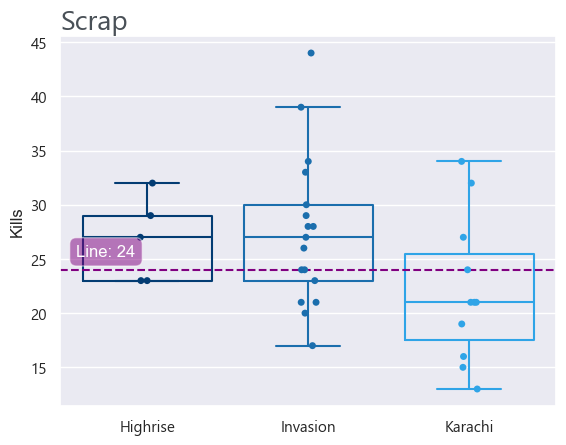

In [32]:
sns.set_theme(style = "darkgrid")

player_input = "Scrap"
gamemode_input = "Control"
cur_line = 24

# Filter data & sort by map name
queried_df = cdlDF[
    (cdlDF["player"] == player_input) &
    (cdlDF["gamemode"] == gamemode_input)] \
    .sort_values("map_name")

# Create figure with gridspec
f, ax = plt.subplots()

# Boxplots
sns.boxplot(queried_df, x = "map_name", y =  "kills", 
            hue = "map_name", showfliers = False, fill = False,
            palette = palettes[gamemode_input])
sns.stripplot(queried_df, x = "map_name", y =  "kills", 
                hue = "map_name", jitter = 0.05, 
                palette = palettes[gamemode_input])
ax.axhline(y = cur_line, color = prizepicks_color, linestyle = '--')

# Y-Axis Label
ax.set_ylabel("Kills")

# Scale and style
min_x = ax.get_xlim()[0] + ((ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.02)
y_pad = scale_kills_axis(queried_df, ax, cur_line)
style_player_plot(ax, min_x, y_pad, player_input, cur_line)

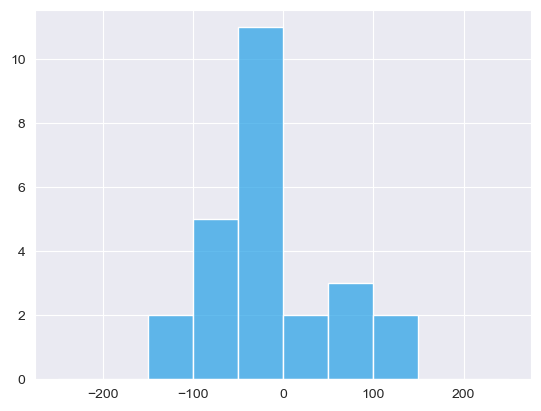

In [10]:
# Team Score Diffs: Hardpoint All
team_score_diffs(cdlDF, "Minnesota ROKKR", theme_color_light, "Hardpoint")

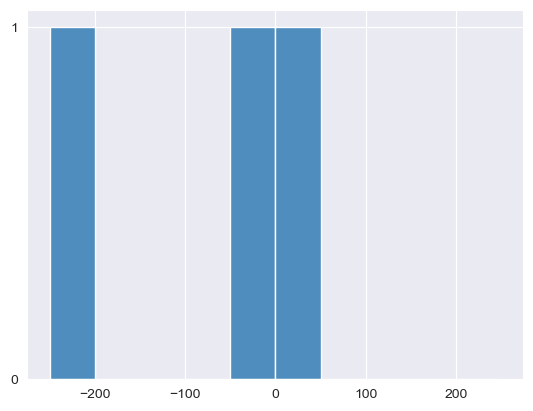

In [11]:
# Team Score Diffs: Hardpoint Single Map
team_score_diffs(cdlDF, "Las Vegas Legion", theme_color_dark, "Hardpoint", "6 Star")

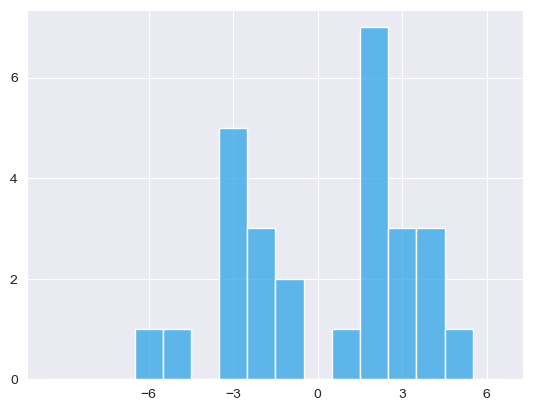

In [12]:
# Team Score Diffs: SnD All
team_score_diffs(cdlDF, "Seattle Surge", theme_color_light, "Search & Destroy")

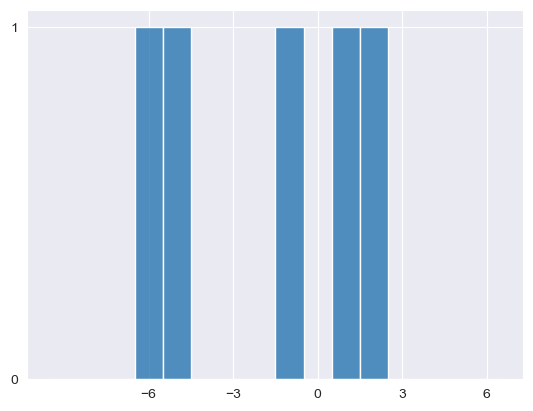

In [13]:
# Team Score Diffs: SnD Single Map
team_score_diffs(cdlDF, "Toronto Ultra", theme_color_dark, "Search & Destroy", "Rio")

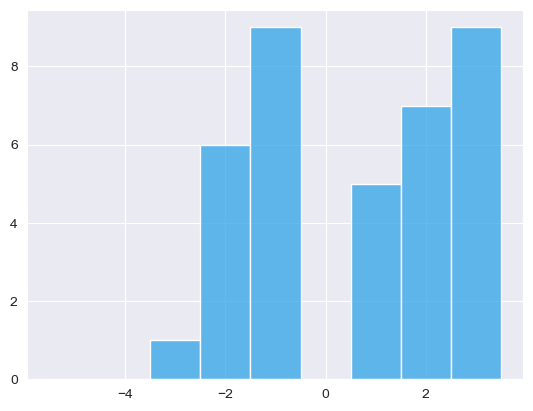

In [14]:
# Team Score Diffs: Control All
team_score_diffs(cdlDF, "OpTic Texas", theme_color_light, "Control")

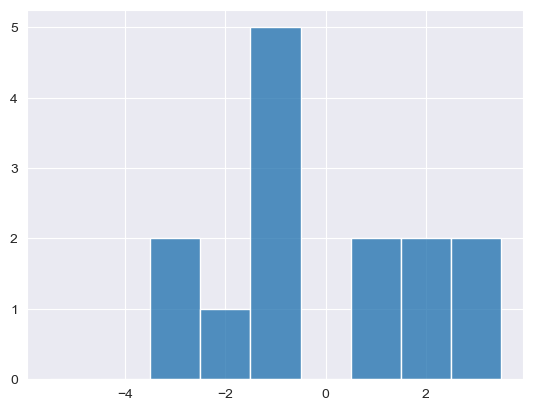

In [15]:
# Team Score Diffs: Control Single Map
team_score_diffs(cdlDF, "Carolina Royal Ravens", theme_color_dark, "Control", "Highrise")

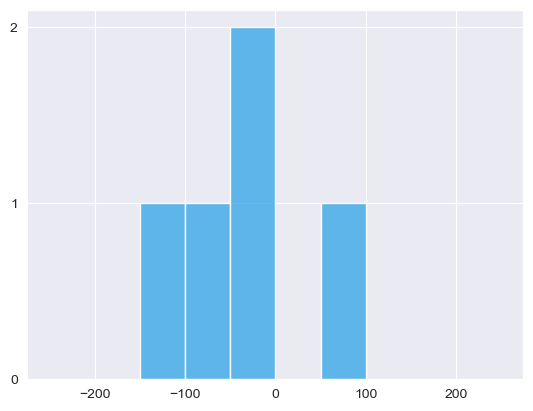

In [16]:
# Team Score Diffs: HP Single Map only Played Once
team_score_diffs(cdlDF, "New York Subliners", theme_color_light, "Hardpoint", "Vista")

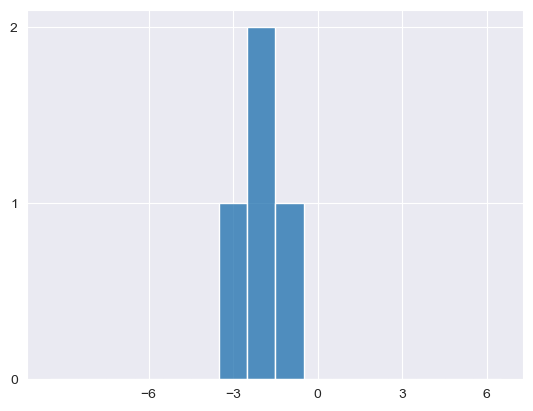

In [17]:
# Team Score Diffs: SnD Single Map only Played Once
team_score_diffs(cdlDF, "Boston Breach", theme_color_dark, "Search & Destroy", "6 Star")

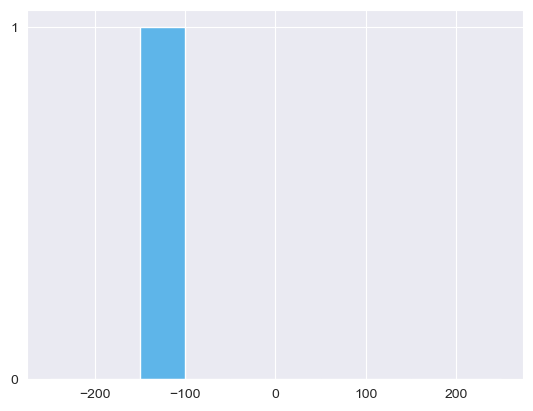

In [18]:
# Team Score Diffs: Team never played Map 
team_score_diffs(cdlDF, "Los Angeles Guerrillas", theme_color_light, "Hardpoint", "Vista")

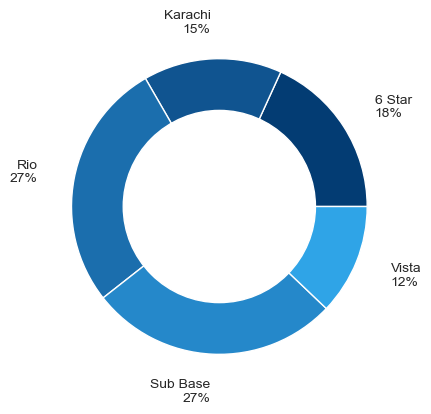

In [19]:
# Team % Maps Played: Hardpoint
team_percent_maps_played(team_summaries, "Miami Heretics", "Hardpoint")

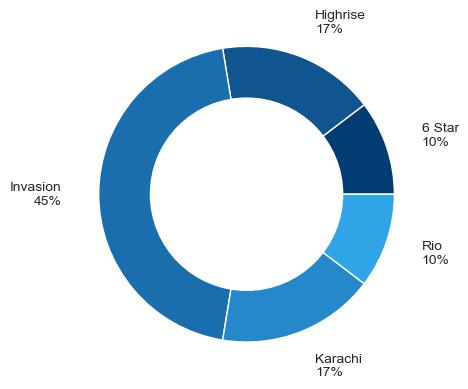

In [20]:
# Team % Maps Played: SnD
team_percent_maps_played(team_summaries, "Las Vegas Legion", "Search & Destroy")

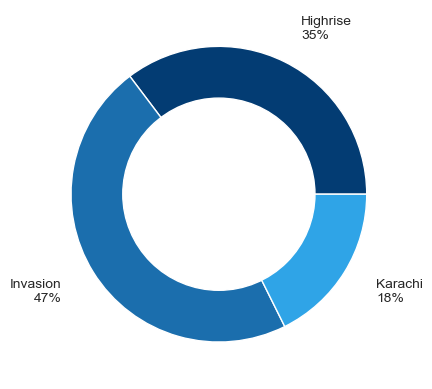

In [21]:
# Team % Maps Played: Control
team_percent_maps_played(team_summaries, "Atlanta FaZe", "Control")

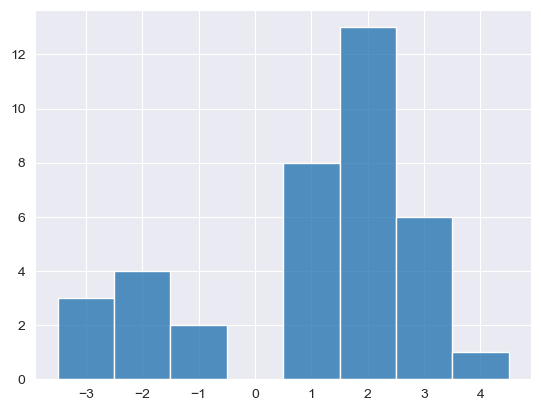

In [22]:
# Team Series Diffs: OpTic
team_series_diffs(series_summaries, "OpTic Texas", theme_color_dark)

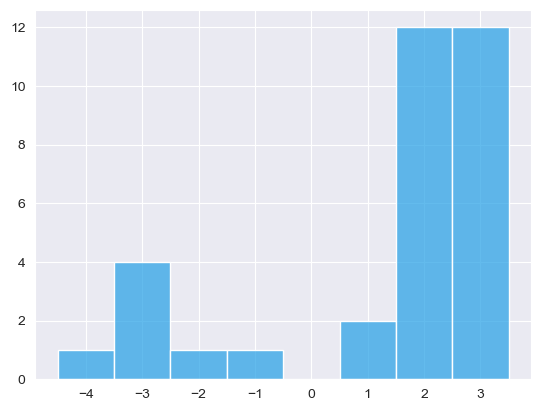

In [23]:
# Team Series Diffs: Ultra
team_series_diffs(series_summaries, "Toronto Ultra", theme_color_light)

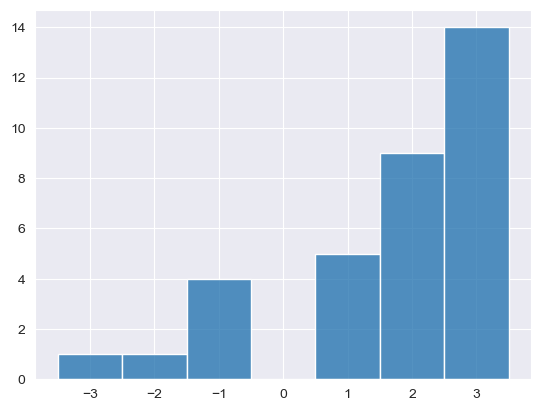

In [24]:
# Team Series Diffs: Ultra
team_series_diffs(series_summaries, "Atlanta FaZe", theme_color_dark)

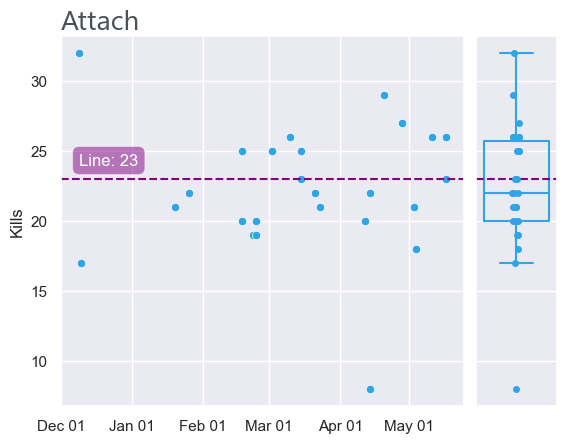

In [25]:
# Player Kills vs Time: Hardpoint All
player_kills_vs_time(cdlDF, "Attach", theme_color_light, "Hardpoint", 23)

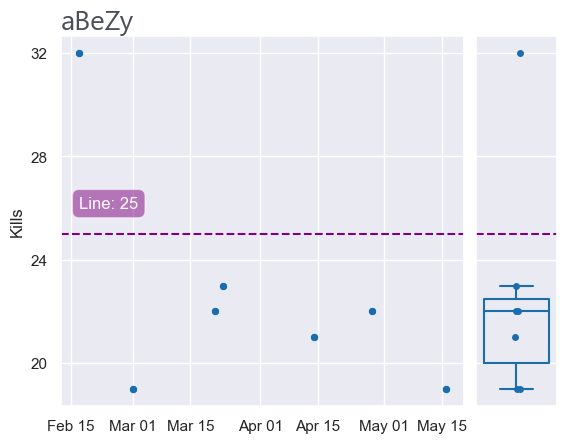

In [26]:
# Player Kills vs Time: Hardpoint Single Map
player_kills_vs_time(cdlDF, "aBeZy", theme_color_dark, "Hardpoint", 25, "Rio")

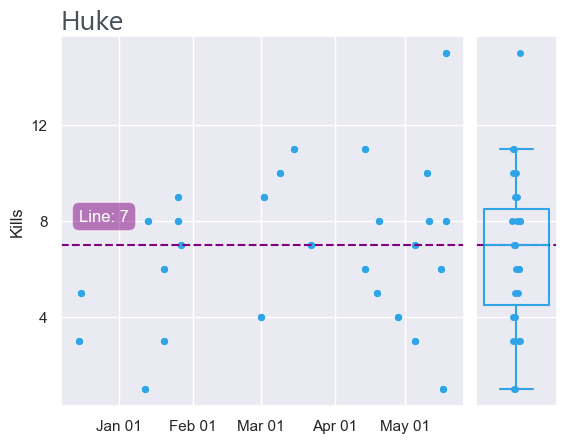

In [27]:
# Player Kills vs Time: SnD All
player_kills_vs_time(cdlDF, "Huke", theme_color_light, "Search & Destroy", 7)

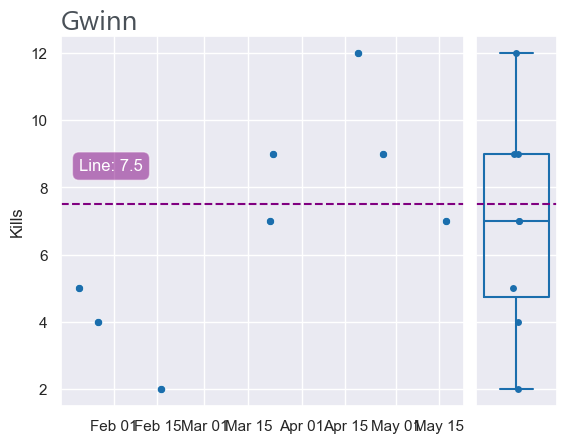

In [28]:
# Player Kills vs Time: SnD Single Map
player_kills_vs_time(cdlDF, "Gwinn", theme_color_dark, "Search & Destroy", 7.5, "Karachi")

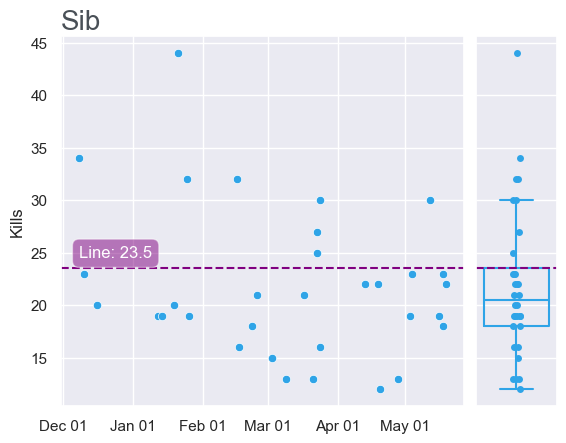

In [25]:
# Player Kills vs Time: Control All
player_kills_vs_time(cdlDF, "Sib", theme_color_light, "Control", 23.5)

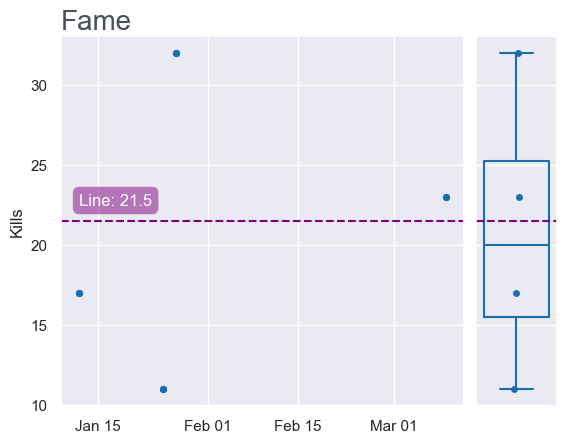

In [26]:
# Player Kills vs Time: Control Single Map
player_kills_vs_time(cdlDF, "Fame", theme_color_dark, "Control", 21.5, "Invasion")

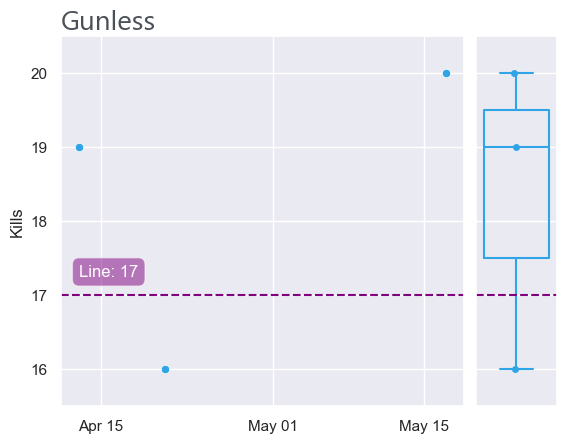

In [10]:
# Player Kills vs Time: Hardpoint Single Map only Played Once
player_kills_vs_time(cdlDF, "Gunless", theme_color_light, "Hardpoint", 17, "Karachi")

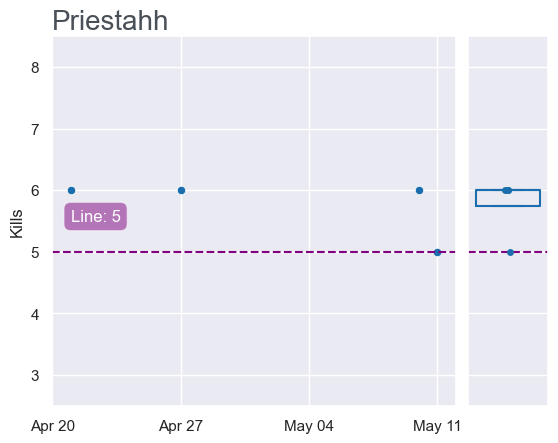

In [28]:
# Player Kills vs Time: SnD Single Map only Played Once
player_kills_vs_time(cdlDF, "Priestahh", theme_color_dark, "Search & Destroy", 5, "6 Star")

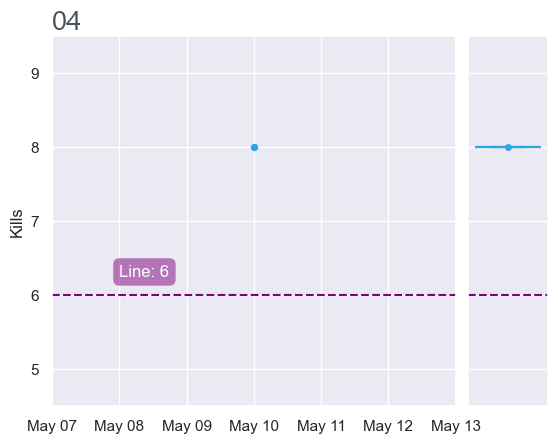

In [61]:
# Player Kills vs Time: Player never played Map
player_kills_vs_time(cdlDF, "04", theme_color_light, "Search & Destroy", 6, "Karachi")

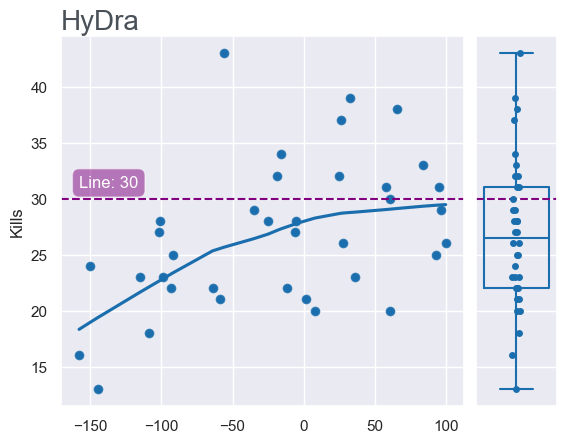

In [30]:
# Player Kills vs Score Diff: Hardpoint All
player_kills_vs_score_diff(cdlDF, "HyDra", theme_color_dark, "Hardpoint", 30)

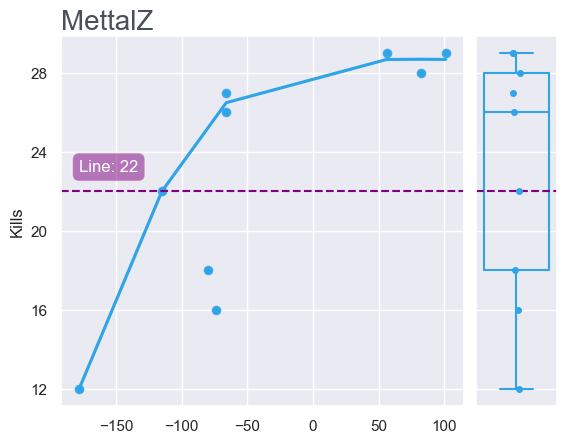

In [38]:
# Player Kills vs Score Diff: Hardpoint Single Map
player_kills_vs_score_diff(cdlDF, "MettalZ", theme_color_light, "Hardpoint", 22, "Rio")

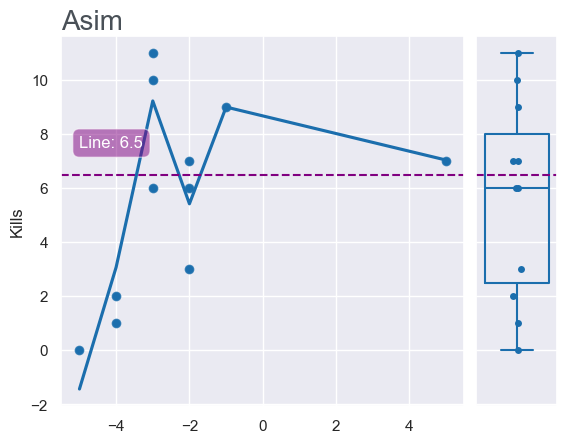

In [39]:
# Player Kills vs Score Diff: SnD All
player_kills_vs_score_diff(cdlDF, "Asim", theme_color_dark, "Search & Destroy", 6.5)

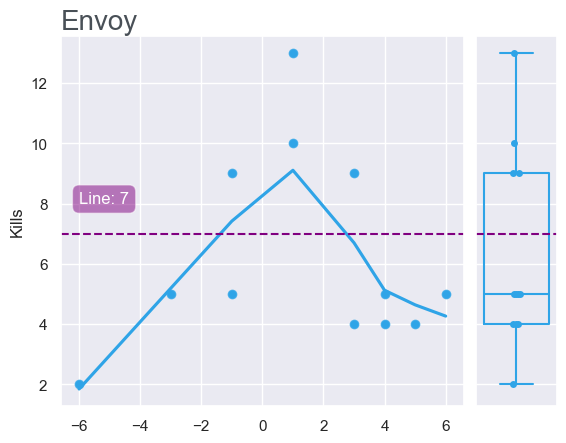

In [31]:
# Player Kills vs Score Diff: SnD Single Map
player_kills_vs_score_diff(cdlDF, "Envoy", theme_color_light, "Search & Destroy", 7, "Karachi")

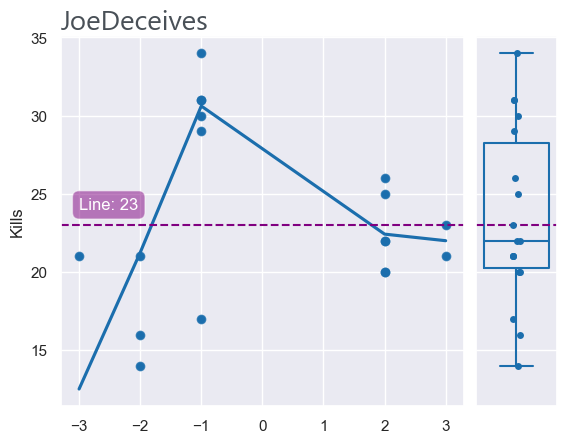

In [29]:
# Player Kills vs Score Diff: Control All
player_kills_vs_score_diff(cdlDF, "JoeDeceives", theme_color_dark, "Control", 23)

c:\Users\David Harler Jr\anaconda3\envs\PythonData\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


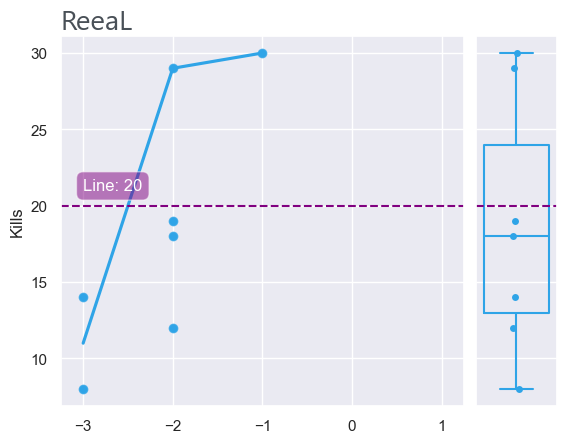

In [30]:
# Player Kills vs Score Diff: Control Single Map
player_kills_vs_score_diff(cdlDF, "ReeaL", theme_color_light, "Control", 20, "Highrise")

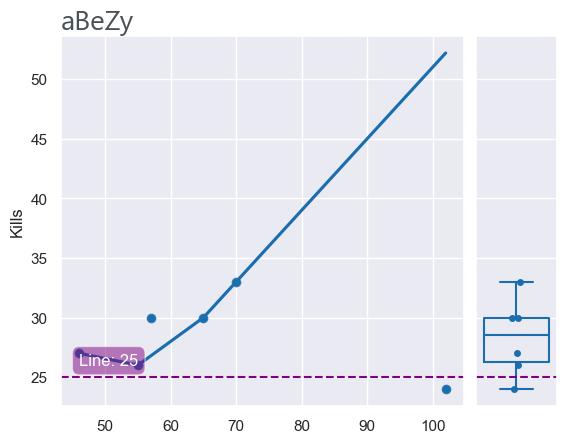

In [31]:
# Player Kills vs Score Diff: Hardpoint Single Map only Played Once
player_kills_vs_score_diff(cdlDF, "aBeZy", theme_color_dark, "Hardpoint", 25, "Vista")

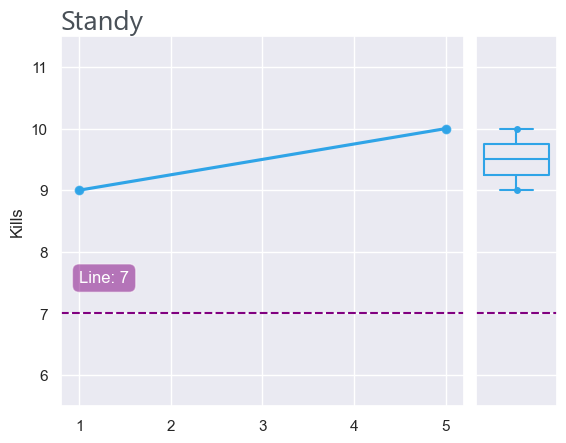

In [32]:
# Player Kills vs Score Diff: SnD Single Map only Played Once
player_kills_vs_score_diff(cdlDF, "Standy", theme_color_light, "Search & Destroy", 7, "6 Star")

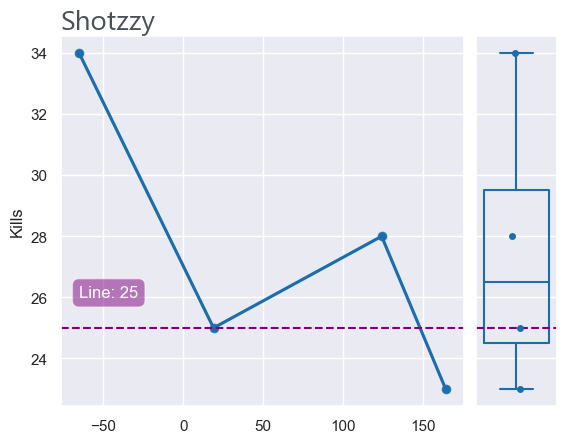

In [33]:
# Player Kills vs Score Diff: Player never played Map
player_kills_vs_score_diff(cdlDF, "Shotzzy", theme_color_dark, "Hardpoint", 25, "Vista")

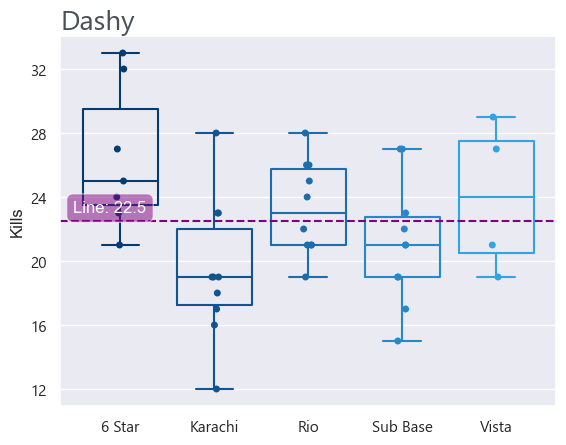

In [34]:
# Boxplots of Player Kills by Map
player_kills_by_map(cdlDF, "Dashy", "Hardpoint", 22.5)

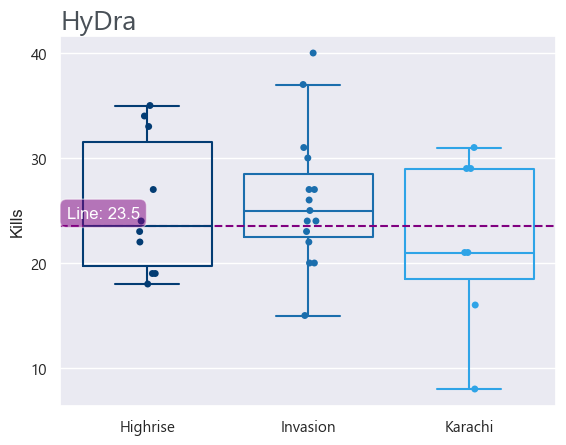

In [35]:
# Boxplots of Player Kills by Map
player_kills_by_map(cdlDF, "HyDra", "Control", 23.5)

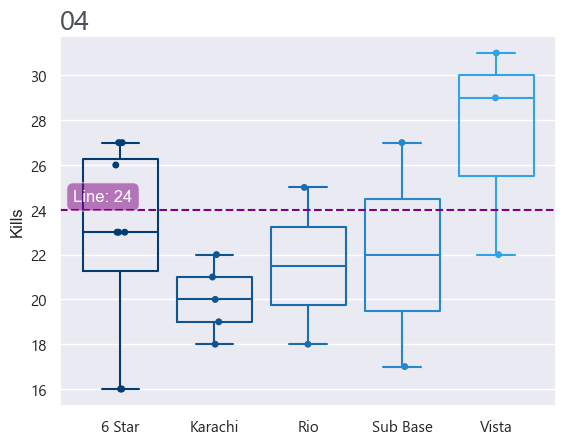

In [36]:
# Boxplots of Player Kills by Map
player_kills_by_map(cdlDF, "04", "Hardpoint", 24)

c:\Users\David Harler Jr\OneDrive\Desktop\dataClass\06-cod-analysis\03 CDL PrizePicks Betting\cdl_prizepicks_betting\cdl-betting-app-v03\seaborn_helpers.py:546: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.boxplot(queried_df, x = "map_name", y =  "kills",
c:\Users\David Harler Jr\OneDrive\Desktop\dataClass\06-cod-analysis\03 CDL PrizePicks Betting\cdl_prizepicks_betting\cdl-betting-app-v03\seaborn_helpers.py:549: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.stripplot(queried_df, x = "map_name", y =  "kills",


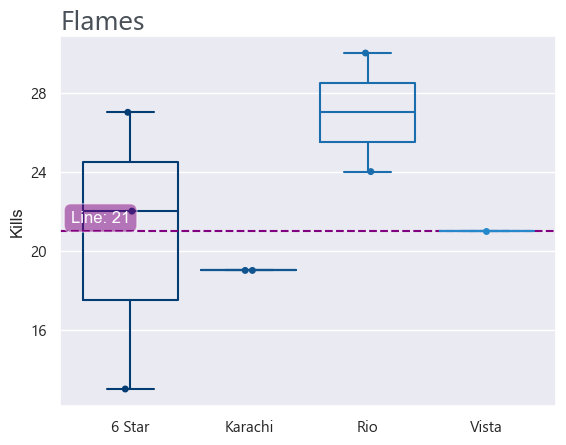

In [37]:
# Boxplots of Player Kills by Map
player_kills_by_map(cdlDF, "Flames", "Hardpoint", 21)

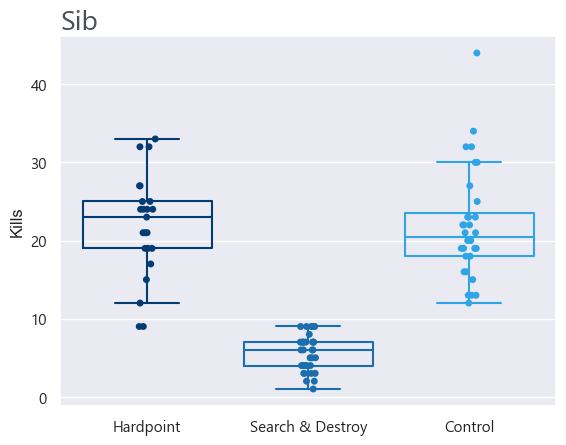

In [38]:
# Boxplots of Player Kills for Selected Mapset
player_kills_by_mapset(cdlDF, "Sib")

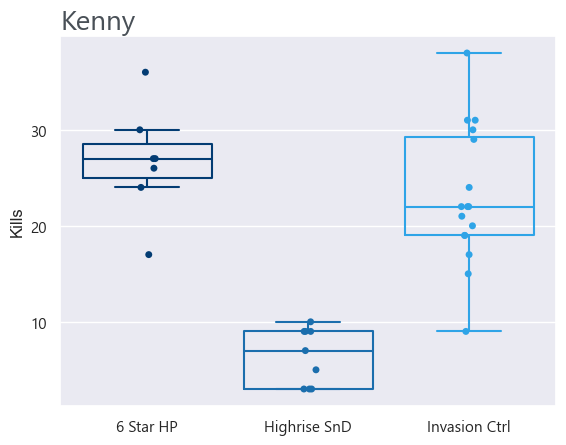

In [12]:
# Boxplots of Player Kills for Selected Mapset
player_kills_by_mapset(cdlDF, "Kenny", "6 Star", "Highrise", "Invasion")

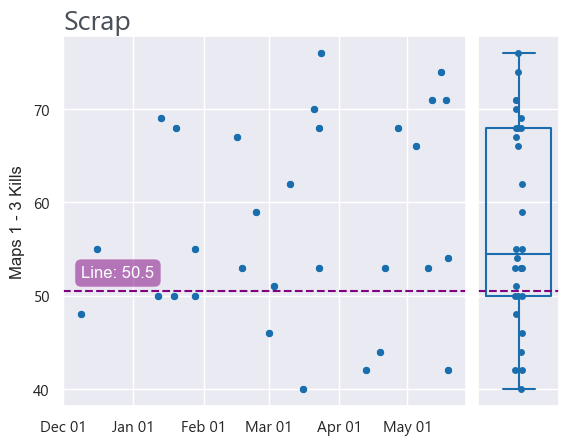

In [10]:
player_1_thru_3_kills_vs_time(adj_1_thru_3_totals, "Scrap", theme_color_dark, 50.5)

## Exploring Ridgeline Plots with Seaborn

In [51]:
# Team colors
team_colors = [
  "#e43d30", "#02ff5b", "#0083c1", "#60269e", "#ff0000", "#ee7623", 
  "#216d6b", "#351f65", "#fff000", "#00ffcc", "#780df2", "#92c951"
]

sns.color_palette(team_colors)

[(0.8941176470588236, 0.23921568627450981, 0.18823529411764706),
 (0.00784313725490196, 1.0, 0.3568627450980392),
 (0.0, 0.5137254901960784, 0.7568627450980392),
 (0.3764705882352941, 0.14901960784313725, 0.6196078431372549),
 (1.0, 0.0, 0.0),
 (0.9333333333333333, 0.4627450980392157, 0.13725490196078433),
 (0.12941176470588237, 0.42745098039215684, 0.4196078431372549),
 (0.20784313725490197, 0.12156862745098039, 0.396078431372549),
 (1.0, 0.9411764705882353, 0.0),
 (0.0, 1.0, 0.8),
 (0.47058823529411764, 0.050980392156862744, 0.9490196078431372),
 (0.5725490196078431, 0.788235294117647, 0.3176470588235294)]

In [52]:
# Adjusted Team colors
team_colors_2 = [
  "#e43d30", "#02ff5b", "#0083c1", "#60269e", "#ff0000", "#ee7623", 
  "#216d6b", "#351f65", "#171C38", "#00ffcc", "#780df2", "#000000"
]

sns.color_palette(team_colors_2)

[(0.8941176470588236, 0.23921568627450981, 0.18823529411764706),
 (0.00784313725490196, 1.0, 0.3568627450980392),
 (0.0, 0.5137254901960784, 0.7568627450980392),
 (0.3764705882352941, 0.14901960784313725, 0.6196078431372549),
 (1.0, 0.0, 0.0),
 (0.9333333333333333, 0.4627450980392157, 0.13725490196078433),
 (0.12941176470588237, 0.42745098039215684, 0.4196078431372549),
 (0.20784313725490197, 0.12156862745098039, 0.396078431372549),
 (0.09019607843137255, 0.10980392156862745, 0.2196078431372549),
 (0.0, 1.0, 0.8),
 (0.47058823529411764, 0.050980392156862744, 0.9490196078431372),
 (0.0, 0.0, 0.0)]

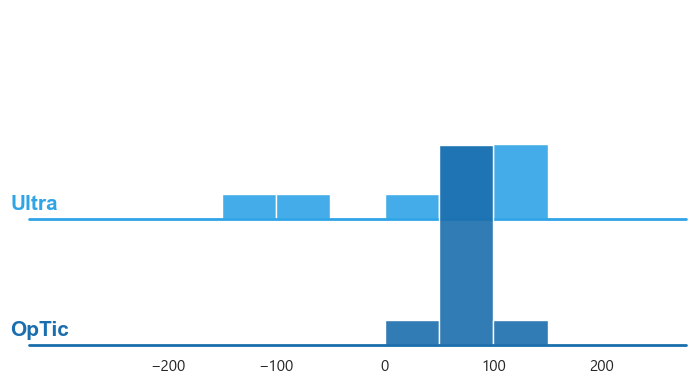

In [11]:
score_diffs_ridge(cdlDF, "Ultra", "OpTic", theme_color_light, theme_color_dark, "Hardpoint", "Sub Base")

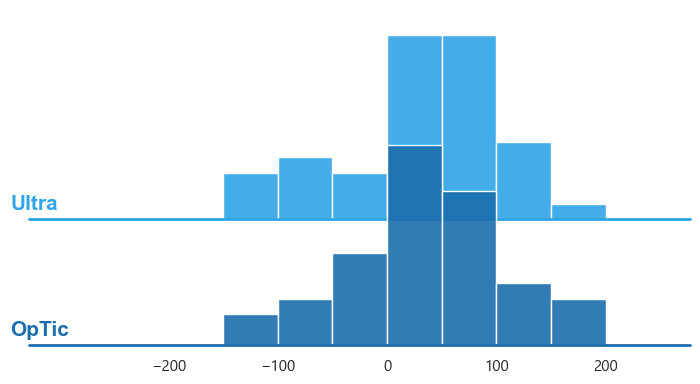

In [13]:
score_diffs_ridge(cdlDF, "Ultra", "OpTic", theme_color_light, theme_color_dark, "Hardpoint")

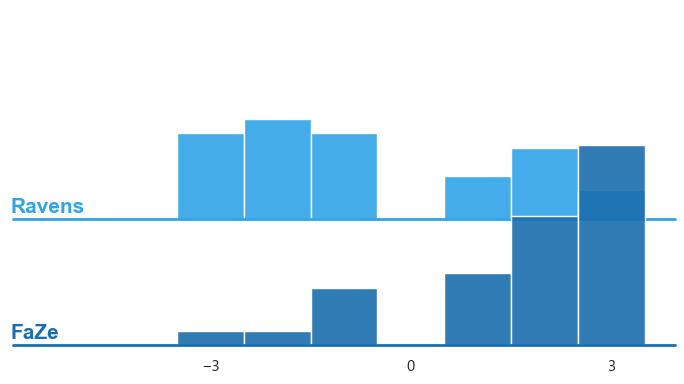

In [12]:
series_diff_ridge(series_summaries, "Ravens", "FaZe", theme_color_light, theme_color_dark)

# Vetoes

In [14]:
# Load vetoes dataset
vetoes = load_vetoes()
vetoes

FileNotFoundError: [Errno 2] No such file or directory: '03 CDL PrizePicks Betting\\cdl_prizepicks_betting\\cdl-betting-app-v03\\data\\vetoes.xlsx'

In [13]:
chart_vetoes(vetoes, "OpTic Texas", "ban", "Hardpoint", theme_color_dark, 1, 3)

KeyError: 'select'